<a href="https://colab.research.google.com/github/Manik400/ML_DL/blob/main/cd_Classifier_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [2]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
# downloading the data from kaggle
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:12<00:00, 45.2MB/s]
100% 1.06G/1.06G [00:13<00:00, 87.7MB/s]


In [4]:
#extrating th data from zip file
import zipfile
zipref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zipref.extractall('/content')
zipref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [6]:
#genrators to generat ata from images

# Create an ImageDataGenerator for the training set with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,       # Normalize the data to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create an ImageDataGenerator for the validation set without augmentation
validation_datagen = ImageDataGenerator(rescale=1./255)

# Load the training data with augmentation
train_ds = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

# Load the validation data without augmentation
validation_ds = validation_datagen.flow_from_directory(
    '/content/test',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

# train_ds = keras.utils.image_dataset_from_directory(
#     directory = '/content/train',
#     labels = 'inferred',
#     label_mode = 'int',
#     batch_size = 32,
#     image_size = (256,256)
# )

# validation_ds = keras.utils.image_dataset_from_directory(
#     directory = '/content/test',
#     labels = 'inferred',
#     label_mode = 'int',
#     batch_size = 32,
#     image_size = (256,256)
# )

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [7]:
#normalize th data from {0 - 255} to {0 - 1}
# def process(image,label):
#   image = tf.cast(image/255. , tf.float32 )
#   return image,label

# train_ds = train_ds.map(process)
# validation_ds = validation_ds.map(process)

In [8]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [10]:
model.compile(optimizer = 'adam' , loss ='binary_crossentropy' , metrics = ['accuracy'])

In [11]:

early_stopping = EarlyStopping(
    monitor='val_loss',   # Monitor the validation loss
    patience=3,           # Number of epochs to wait for improvement
    restore_best_weights=True  # Restore the best model weights
)


# history = model.fit(train_ds,epochs=10,validation_data=validation_ds)
history = model.fit(
    train_ds,
    epochs=10,  # You can set a higher number of epochs
    validation_data=validation_ds,
    callbacks=[early_stopping]  # Add the early stopping callback
)


Epoch 1/10
625/625 [==============================] - 367s 571ms/step - loss: 1.1615 - accuracy: 0.5580 - val_loss: 0.6518 - val_accuracy: 0.6254
Epoch 2/10
625/625 [==============================] - 351s 562ms/step - loss: 0.6546 - accuracy: 0.6281 - val_loss: 0.6621 - val_accuracy: 0.5826
Epoch 3/10
625/625 [==============================] - 353s 565ms/step - loss: 0.6162 - accuracy: 0.6636 - val_loss: 0.5461 - val_accuracy: 0.7256
Epoch 4/10
625/625 [==============================] - 354s 566ms/step - loss: 0.5689 - accuracy: 0.7055 - val_loss: 0.5507 - val_accuracy: 0.7222
Epoch 5/10
625/625 [==============================] - 351s 561ms/step - loss: 0.5598 - accuracy: 0.7194 - val_loss: 1.1494 - val_accuracy: 0.5130
Epoch 6/10
625/625 [==============================] - 353s 565ms/step - loss: 0.5444 - accuracy: 0.7237 - val_loss: 0.4855 - val_accuracy: 0.7688
Epoch 7/10
625/625 [==============================] - 358s 572ms/step - loss: 0.5105 - accuracy: 0.7520 - val_loss: 0.4644 -

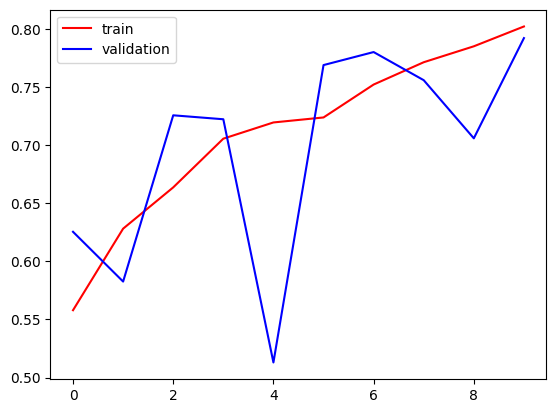

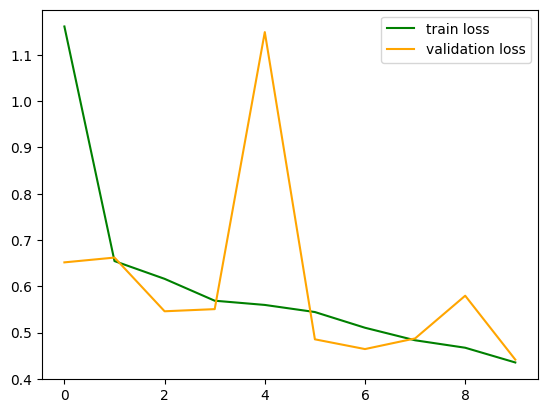

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

plt.plot(history.history['loss'], color='green', label='train loss')
plt.plot(history.history['val_loss'], color='orange', label='validation loss')
plt.legend()
plt.show()
